# Градиентный спуск. Повторение и визуализация.

Предположим, что у нас есть функция:

$$
y = f(x) = x - x^3
$$

... и мы хотим найти ее минимум.

Он ищется довольно просто через взятие двойной производной.

$$
\frac{dy}{dx} = f^\prime(x) = 1 - 3x^2
$$

Приравниваем к нулю и получаем, что -> 

$$
x_1 = \frac{1}{\sqrt{3}}
$$

$$
x_2 = -\frac{1}{\sqrt{3}}
$$

Для того, чтобы какое то из этих значений являлось локальным минимумом, 2 производная должна быть положительна в этой точке.

$$
\frac{d^2y}{dx^2} = f^{\prime\prime}(x) = -6x
$$

Очевидно, что __минимум__ находится в точке 

$$
x_2 = -\frac{1}{\sqrt{3}}
$$

__Максимум__ в точке:

$$
x_1 = \frac{1}{\sqrt{3}}
$$

---------------------------------

**Изобразим эту функцию**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
def func(x):
    return x - x**3

def func_der(x):
    return 1 - 3 * (x ** 2)

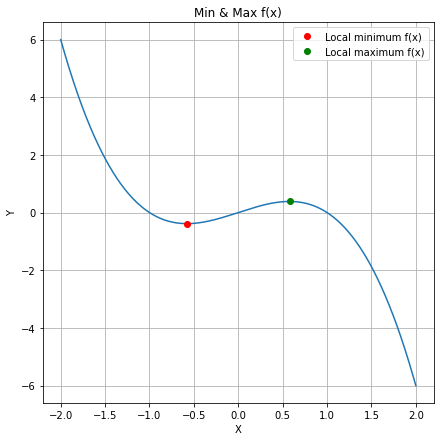

In [21]:
x = np.linspace(-2, 2, 1000)
y = func(x)

fig, ax = plt.subplots(figsize=(7, 7))

min_ = -(1)/(3 ** 0.5)
max_ = (1)/(3 ** 0.5)

plt.plot(x, y)
plt.plot(min_, func(min_), 'ro', label = "Local minimum f(x)")
plt.plot(max_, func(max_), 'go', label = "Local maximum f(x)")
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Min & Max f(x)")
plt.legend();

Теперь нужно найти этот локальный минимум на языке компьютера. 

В задачах статистического и машинного обучения функция зависимости нам не дана, поэтому метод градиентного спуска (а также все его разновидности) оптимален.

__Алгоритм такой:__

> Устанавливаем начальную точку, с которой мы будем стартовать, а также длину шага, с которой будем изменять текущее положение.

> Начинаем цикл:

>> 1. Обновляем позицию через подсчет производной и шага
>> 2. Добавляем к исходной точке наше продвижение по градиенту.


In [35]:
point = -1
lr = 0.01

for i in range(1000):
    update = -lr * func_der(point) # минус потому что антиградиент
    point += update

# более короткая и правильная запись

# for i in range(1000):               
#     point -= lr * func_der(point)

print(f"Локальный минимум f(x) is : {point}")

Локальный минимум f(x) is : -0.5773502691896273


## Попробуем заанимировать процесс нахождения минимума, используя алгоритм градиентного спуска.

На каждой итерации будем добавлять в список текущее значение точки, в которой мы находимся.

In [85]:
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

In [86]:
sgd_points = [-1.8]

In [87]:
point = -1.8
lr = 0.01

for i in range(1000):               
    point -= lr * func_der(point)
    sgd_points.append(point)

<br>                                          

__Приступим к построению анимации__

In [88]:
plt.rcParams.update({'font.size': 22})

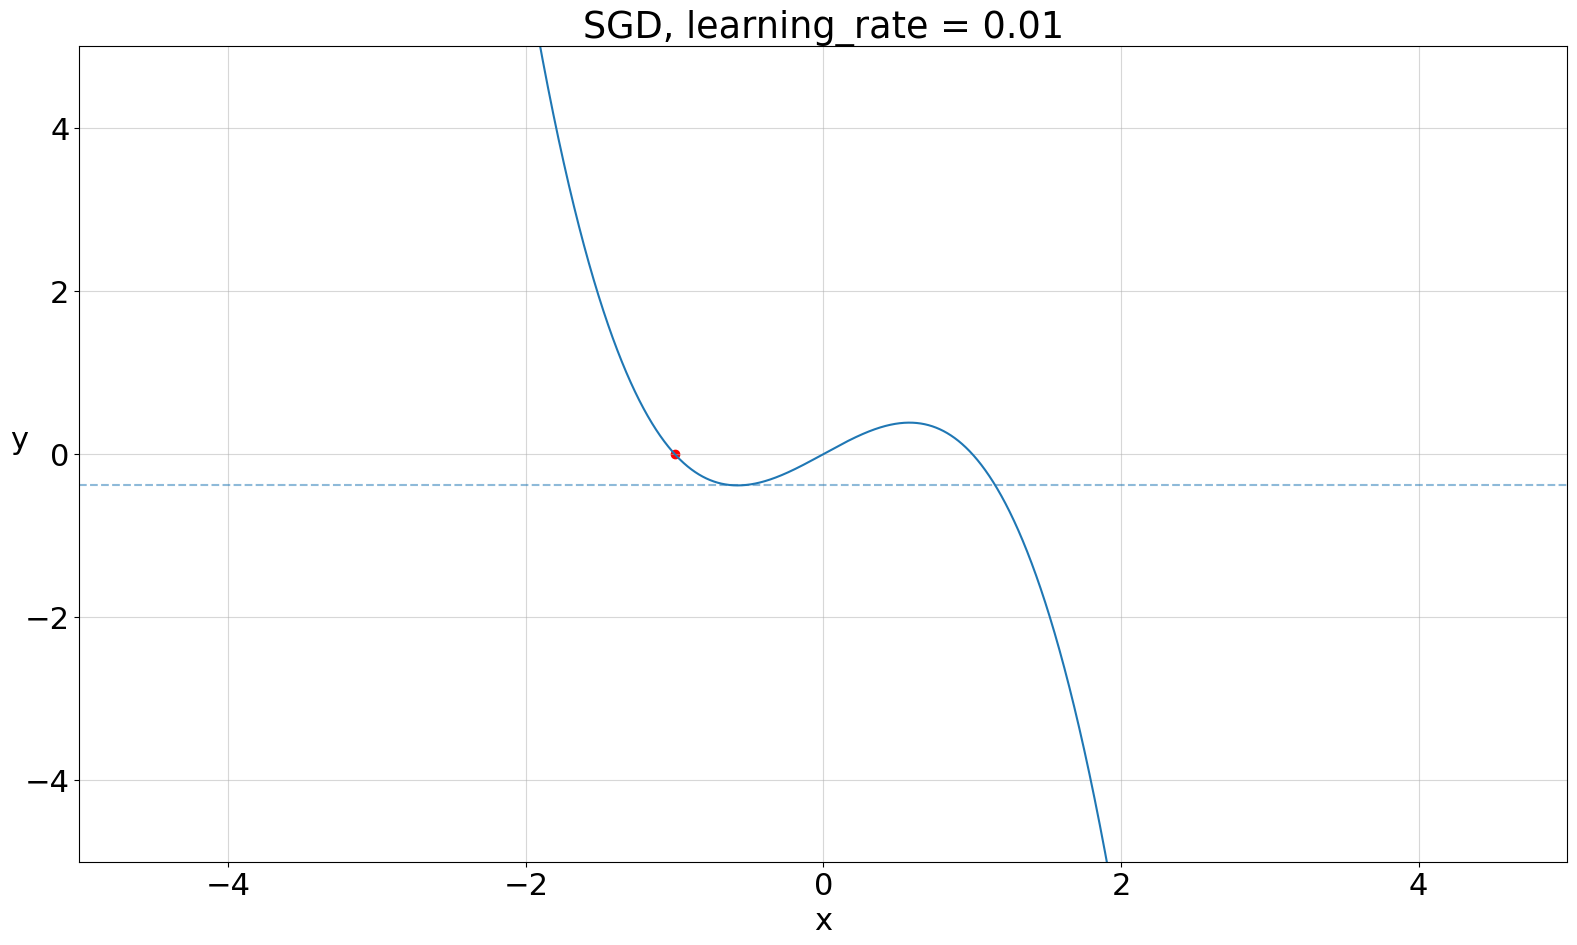

In [89]:
fig = plt.figure(dpi = 100)

fig.set_figheight(10.80)
fig.set_figwidth(19.20)

x_ = np.linspace(-5, 5, 10000)
y_ = func(x_)

ax = plt.axes()
ax.plot(x_, y_)
ax.grid(alpha = 0.5)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel('x')
ax.set_ylabel('y', rotation = 0)
ax.scatter(-1, func(-1), color = 'red')
ax.hlines(func(-0.5773502691896256), -5, 5, linestyles = 'dashed', alpha = 0.5)

ax.set_title('SGD, learning_rate = 0.01');

In [90]:
## функция покадровой отрисовки графика и точки
def animate(i):
    ax.clear()
    ax.plot(x_, y_)
    ax.grid(alpha = 0.5)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('x')
    ax.set_ylabel('y', rotation = 0)
    ax.hlines(func(-0.5773502691896256), -5, 5, linestyles = 'dashed', alpha = 0.5)
    ax.set_title('SGD, learning_rate = 0.01')
    
    ax.scatter(sgd_points[i], func(sgd_points[i]), color = 'red')

In [91]:
anim = animation.FuncAnimation(fig, animate, frames = 200, interval = 20)

anim.save("StochasticGradientDescents.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


<br>

<br>

**Вот что получилось**

![SGD](img/StochasticGradientDescents.gif "segment")

<br>

<br>